<a href="https://colab.research.google.com/github/imabrana/Machine-Learning-Project-on-Surface-Tension-of-Ionic-Liquids/blob/main/MLCE_2025_Project_Rana_Abhishek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCE 2025 - Course Project

The aim of this project is to predict surface tension for ionic liquids (ILs) as a function of temperature and molecular descriptors. The data set is taken from [this journal paper](http://xlink.rsc.org/?doi=C9SE00472F&amp;newsite=1) and molecular descriptors were added by us using the [RDKit toolkit](https://www.rdkit.org/docs/source/rdkit.html). Please use the data set in _Surface_tension_ILs_RDkit.xlsx_. Temperatures and surface tension are given in K and mN/m, respectively.

1. Save this notebook as _MLCE_project_lastname_firstname.ipynb_.
2. Please submit only this notebook after completion. Use the dataset as provided. We will run and mark your code with the provided data as input.
3. Provide your answers in the cells below, of course you can use more than one cell for each task.
4. There are 8 tasks in total with maximum of 8 points. Points will be given in 0.5P increments. Please provide the solutions to all tasks in the subsections to receive full points.



**Collusion is not permitted**. You have to solve the assignment on your own. You may use online sources for code as long as you provide the source.



### **Deadline: 06. July 2025, 23:59**

#### **Task 1:** Plot surface tension vs. temperature for one IL. **(1P)**
- Add a column for the name of the IL (cation ID plus anion ID).
- Identify the ionic liquid (IL) (a unique cation–anion pair) with the maximum number of data points in the dataset.
- Plot surface tension vs. temperature for this IL.

The IL with the most data points is C1119_A0048 with 38 points.


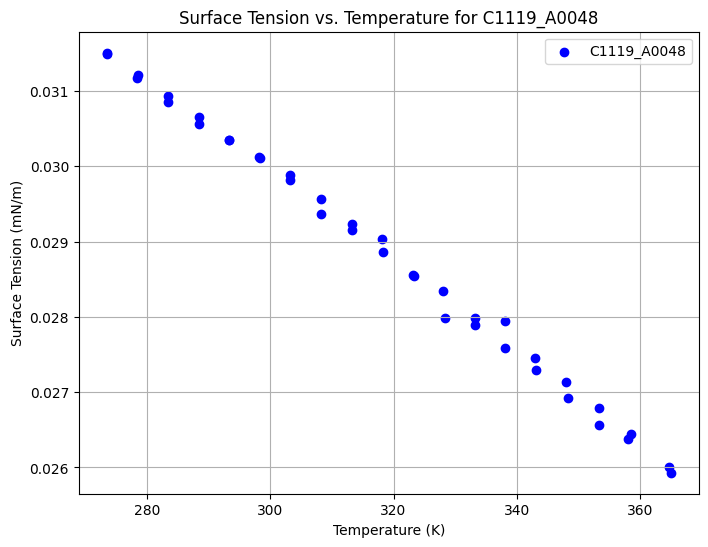

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import Matern
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
#Importing Data
!pip install -q xlrd
df = pd.read_excel('/content/Surface_tension_ILs_RDkit.xlsx')
df.head(10)
#Extracting the Data for a unique Cation-Anion Pair
df['IL_Name'] = df['Cation_ID'] + '_' + df['Anion_ID']
il_counts = df['IL_Name'].value_counts() # To identify IL with maximum number ofData Points
max_il = il_counts.idxmax()
max_il_count = il_counts.max()
print(f"The IL with the most data points is {max_il} with {max_il_count} points.")
il_data = df[df['IL_Name'] == max_il] # Filter data for the IL with maximum data points
#Plot surface tension vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(il_data['Temperature'], il_data['Surface_tension'], color='blue', label=max_il)
plt.xlabel('Temperature (K)')
plt.ylabel('Surface Tension (mN/m)')
plt.title(f'Surface Tension vs. Temperature for {max_il}')
plt.legend()
plt.grid(True)
plt.show()


#### **Task 2:** Predict surface tension from temperature for this IL using polynomial regression. **(1P)**
- Evaluate the prediction accuracy for varying degree of polynomial, plot the results, and identify the best degree.

Degree 1: MSE = 0.000000, R2 = 0.996514
Degree 2: MSE = 0.000000, R2 = 0.996942
Degree 3: MSE = 0.000000, R2 = 0.996952
Degree 4: MSE = 0.000000, R2 = 0.996952
Degree 5: MSE = 0.000000, R2 = 0.996953
Best Polynomial Degree: 5 (MSE = 0.000000)


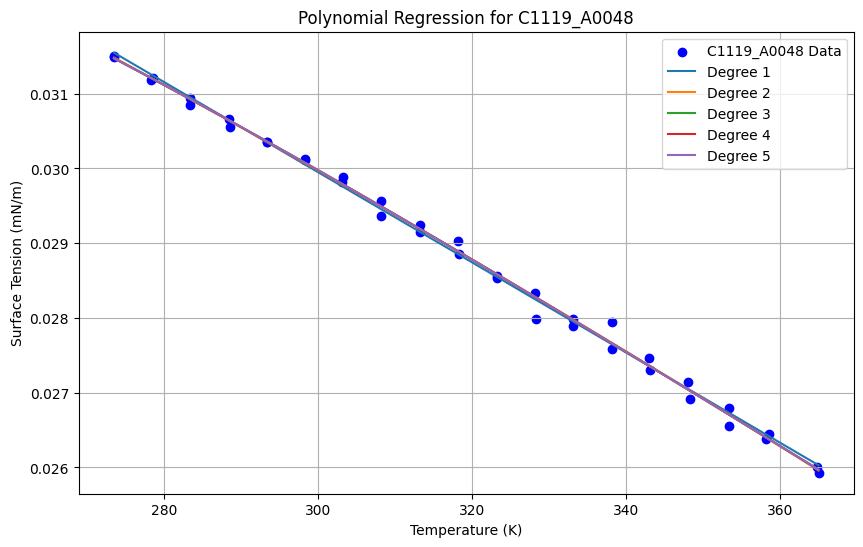

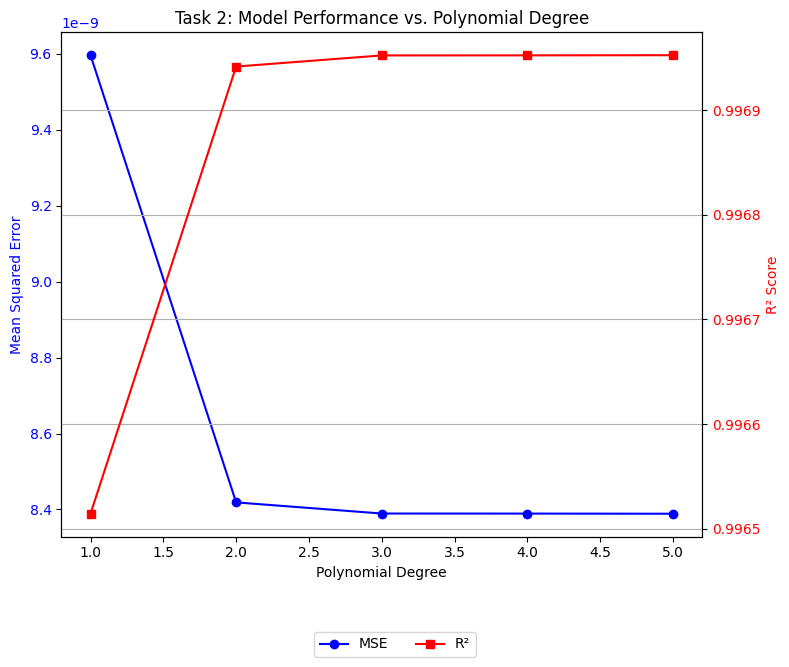

In [61]:
# Polynomial regression to predict surface tension from temperature
T = il_data['Temperature'].values.reshape(-1, 1)
ST = il_data['Surface_tension'].values

degrees = range(1, 6)
mse_scores = []
r2_scores = []
models = []
for degree in degrees:
  polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  polyreg.fit(T, ST)
  ST_pred = polyreg.predict(T)
  mse = mean_squared_error(ST, ST_pred)
  r2 = r2_score(ST, ST_pred)
  mse_scores.append(mse)
  r2_scores.append(r2)
  models.append(polyreg)
  print(f"Degree {degree}: MSE = {mse:.6f}, R2 = {r2:.6f}")

best_degree = degrees[np.argmin(mse_scores)]
print(f"Best Polynomial Degree: {best_degree} (MSE = {min(mse_scores) :.6f})")

#Plot polynomial fits
plt.figure(figsize=(10, 6))
plt.scatter(T, ST, color='blue', label=f'{max_il} Data')
T_plot = np.linspace(min(T), max(T), 100).reshape(-1, 1)
for degree, model in zip(degrees, models):
    ST_plot = model.predict(T_plot)
    plt.plot(T_plot, ST_plot, label=f'Degree {degree}')
plt.xlabel('Temperature (K)')
plt.ylabel('Surface Tension (mN/m)')
plt.title(f'Polynomial Regression for {max_il}')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE and R2
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(degrees, mse_scores, 'b-', marker='o', label='MSE')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(degrees, r2_scores, 'r-', marker='s', label='R²')
ax2.set_ylabel('R² Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Task 2: Model Performance vs. Polynomial Degree')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.grid(True)
plt.show()


#### **Task 3:** Train a Gaussian process regression to predict the surface tension from temperature for this IL. **(1P)**
- Try at least two kernels.
- Plot the training set, the prediction for the test set, and the standard deviation.


Kernel RBF: MSE = 0.000005


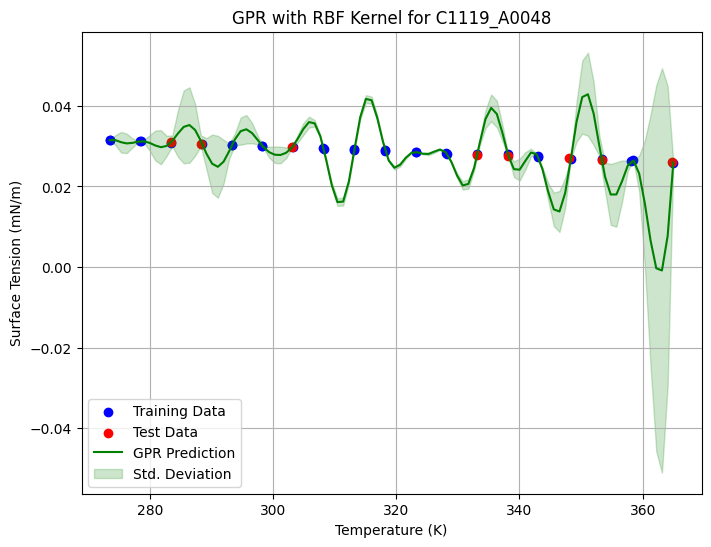

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Kernel Matern: MSE = 0.000000


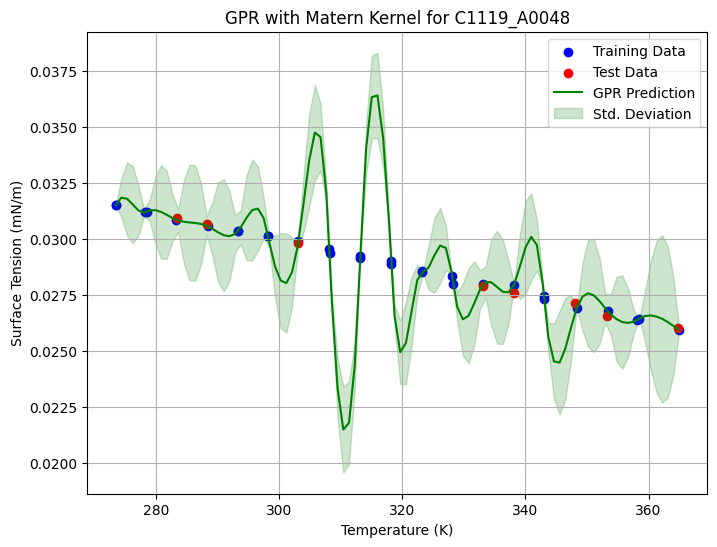

In [62]:
# Gaussian Process Regression with two kernels
T_train, T_test, ST_train, ST_test = train_test_split(T, ST, test_size=0.2, random_state=42)
# Define kernels
kernels = [RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5)]
for kernel in kernels:
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
    gpr.fit(T_train, ST_train)
    ST_pred, ST_std = gpr.predict(T_test, return_std=True)
    mse = mean_squared_error(ST_test, ST_pred)
    print(f"Kernel {kernel.__class__.__name__}: MSE = {mse:.6f}")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(T_train, ST_train, color='blue', label='Training Data')
    plt.scatter(T_test, ST_test, color='red', label='Test Data')
    T_plot = np.linspace(min(T), max(T), 100).reshape(-1, 1)
    ST_plot, ST_plot_std = gpr.predict(X_plot, return_std=True)
    plt.plot(T_plot, ST_plot, color='green', label='GPR Prediction')
    plt.fill_between(T_plot.ravel(), ST_plot - ST_plot_std, ST_plot + ST_plot_std,
                     alpha=0.2, color='green', label='Std. Deviation')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Surface Tension (mN/m)')
    plt.title(f'GPR with {kernel.__class__.__name__} Kernel for {max_il}')
    plt.legend()
    plt.grid(True)
    plt.show()

#### **Task 4:** Now perform data splitting for the entire data set. **(1P)**
- Remove rows in the data set that contain `NaN` values.
- Perform rigorous data splitting based on the ionic liquids (not on the data points).
- Print the number of ionic liquids as well as number of data points in the sets.

  

In [63]:
# Data splitting based on ILs
# Remove rows with NaN
df_clean = df.dropna()

# Get unique ILs and split
unique_ils = df_clean['IL_Name'].unique()
train_ils, test_ils = train_test_split(unique_ils, test_size=0.2, random_state=42)

# Create train and test sets
train_data = df_clean[df_clean['IL_Name'].isin(train_ils)]
test_data = df_clean[df_clean['IL_Name'].isin(test_ils)]

print(f"Task 4: Number of ILs in train set: {len(train_ils)}")
print(f"Task 4: Number of data points in train set: {len(train_data)}")
print(f"Task 4: Number of ILs in test set: {len(test_ils)}")
print(f"Task 4: Number of data points in test set: {len(test_data)}")

Task 4: Number of ILs in train set: 240
Task 4: Number of data points in train set: 1994
Task 4: Number of ILs in test set: 60
Task 4: Number of data points in test set: 596


#### **Task 5:** Performs feature selection for predicting surface tension. **(1P)**

1. Use temperature and RDKit molecular descriptors (from column `'I'` to the end) as input features.
2. Apply two feature selection methods:
  - a filter method (e.g., correlation-based).
  - a wrapper method (e.g., recursive feature elimination with a model of your choice).
3. Determine and print the most important features selected by both methods.




In [64]:
# Feature selection
# Select features from column 'I' onwards plus Temperature
# Exclude non-numeric columns like 'IL_Name'
feature_cols = ['Temperature'] + list(df_clean.columns[8:])
numeric_cols = df_clean[feature_cols].select_dtypes(include=np.number).columns.tolist()
T = df_clean[numeric_cols]
ST = df_clean['Surface_tension']

# Filter method: Correlation-based (SelectKBest with f_regression)
selector_filter = SelectKBest(score_func=f_regression, k=10)
selector_filter.fit(T, ST)
selected_filter_indices = selector_filter.get_support(indices=True)
selected_filter_features = [T.columns[i] for i in selected_filter_indices]
print("Top 10 features (correlation-based):", selected_filter_features)

# Wrapper method: Recursive Feature Elimination with Linear Regression
estimator = LinearRegression()
selector_rfe = RFE(estimator, n_features_to_select=10)
selector_rfe.fit(T, ST)
selected_rfe_indices = selector_rfe.get_support(indices=True)
selected_rfe_features = [T.columns[i] for i in selected_rfe_indices]
print("Top 10 features (RFE):", selected_rfe_features)

Top 10 features (correlation-based): ['Cation_FpDensityMorgan1', 'Cation_BCUT2D_MWLOW', 'Cation_EState_VSA5', 'Anion_NumValenceElectrons', 'Anion_Chi0', 'Anion_Chi0n', 'Anion_Kappa1', 'Anion_PEOE_VSA4', 'Anion_HeavyAtomCount', 'Anion_fr_alkyl_halide']
Top 10 features (RFE): ['Cation_MaxPartialCharge', 'Cation_MinPartialCharge', 'Cation_MaxAbsPartialCharge', 'Cation_MinAbsPartialCharge', 'Cation_NumAromaticCarbocycles', 'Cation_RingCount', 'Cation_fr_allylic_oxid', 'Cation_fr_benzene', 'Cation_fr_bicyclic', 'Cation_fr_quatN']


#### **Task 6**: Perform k-nearest neighbors (KNN) regression to predict surface tension. **(1P)**

- Use features from task 5, along with temperature as inputs.
- Evaluate the prediction accuracy for varying number of neighbors and plot the results.
  


Task 6: k=1: MSE = 0.000106, R2 = -0.532981
Task 6: k=2: MSE = 0.000114, R2 = -0.655878
Task 6: k=3: MSE = 0.000117, R2 = -0.694784
Task 6: k=4: MSE = 0.000120, R2 = -0.734729
Task 6: k=5: MSE = 0.000121, R2 = -0.757577
Task 6: k=6: MSE = 0.000121, R2 = -0.746322
Task 6: k=7: MSE = 0.000119, R2 = -0.729397
Task 6: k=8: MSE = 0.000119, R2 = -0.717535
Task 6: k=9: MSE = 0.000118, R2 = -0.702571
Task 6: k=10: MSE = 0.000117, R2 = -0.691588
Task 6: k=11: MSE = 0.000118, R2 = -0.709335
Task 6: k=12: MSE = 0.000114, R2 = -0.658438
Task 6: k=13: MSE = 0.000112, R2 = -0.628450
Task 6: k=14: MSE = 0.000111, R2 = -0.602857
Task 6: k=15: MSE = 0.000109, R2 = -0.582075
Task 6: k=16: MSE = 0.000106, R2 = -0.542054
Task 6: k=17: MSE = 0.000106, R2 = -0.529920
Task 6: k=18: MSE = 0.000104, R2 = -0.505934
Task 6: k=19: MSE = 0.000103, R2 = -0.495611
Task 6: k=20: MSE = 0.000101, R2 = -0.469024


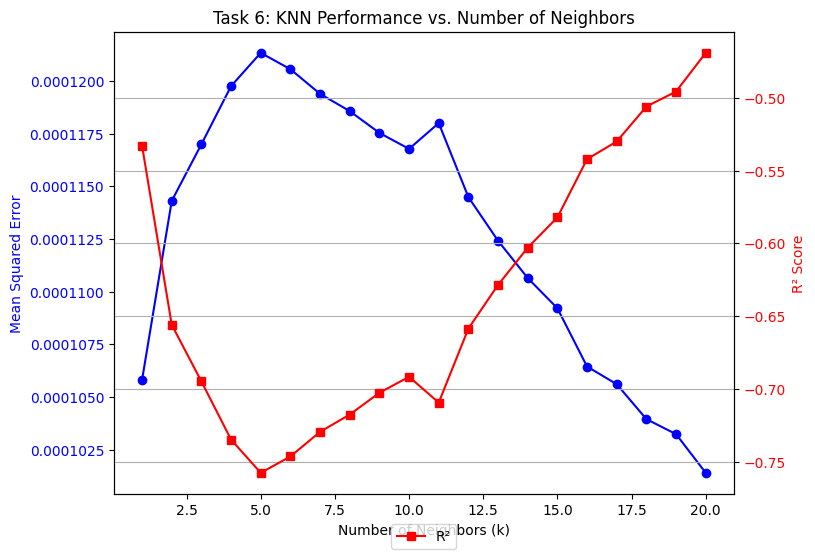

In [65]:
# KNN regression
# Use selected features from RFE
T_train = train_data[selected_rfe_features]
ST_train = train_data['Surface_tension']
T_test = test_data[selected_rfe_features]
ST_test = test_data['Surface_tension']

# Scale features
scaler = StandardScaler()
T_train_scaled = scaler.fit_transform(T_train)
T_test_scaled = scaler.transform(T_test)

# Evaluate KNN for different k values
k_values = range(1, 21)
knn_mse = []
knn_r2 = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(T_train_scaled, ST_train)
    ST_pred = knn.predict(T_test_scaled)
    mse = mean_squared_error(ST_test, ST_pred)
    r2 = r2_score(ST_test, ST_pred)
    knn_mse.append(mse)
    knn_r2.append(r2)
    print(f"Task 6: k={k}: MSE = {mse:.6f}, R2 = {r2:.6f}")

# Plot KNN performance
plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_mse, 'b-', marker='o', label='MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error', color='b')
plt.tick_params(axis='y', labelcolor='b')
ax2 = plt.twinx()
ax2.plot(k_values, knn_r2, 'r-', marker='s', label='R²')
ax2.set_ylabel('R² Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Task 6: KNN Performance vs. Number of Neighbors')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.grid(True)
plt.show()

#### **Task 7:** Train an artificial neural network (ANN) to predict surface tension. **(1P)**

- Use the features from the feature selection in task 5 along with temperature as inputs.
- Plot training and validation error.



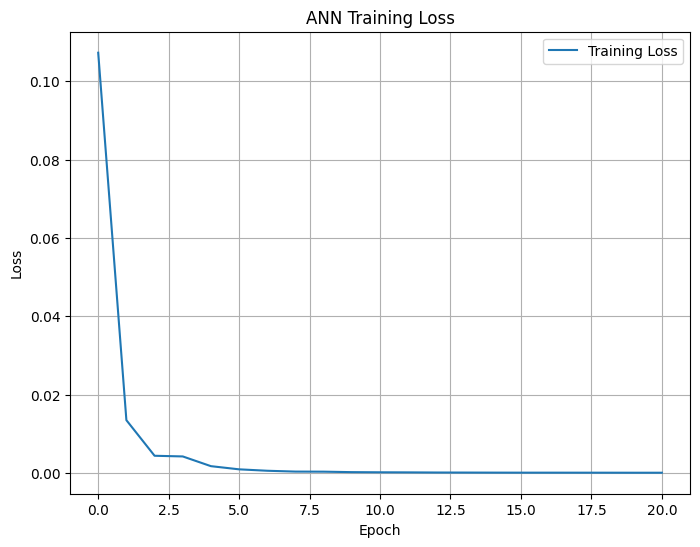

ANN Test MSE: 0.000997
ANN Test R2: -13.439606


In [68]:
# ANN to predict surface tension
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann.fit(T_train_scaled, ST_train)

# Plot training and validation error (using loss curve for training)
plt.figure(figsize=(8, 6))
plt.plot(ann.loss_curve_, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Validation loss requires a separate validation set or cross-validation
ST_pred = ann.predict(T_test_scaled)
print(f"ANN Test MSE: {mean_squared_error(ST_test, ST_pred):.6f}")
print(f"ANN Test R2: {r2_score(ST_test, ST_pred):.6f}")

#### **Task 8**: Perform hyperparameter optimization for an artificial neural network (ANN) to predict surface tension. Vary at least three hyperparameters. Evaluate each model's performance. Choose your best model and report its performance. **(1P)**




Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}
Best model Test MSE: 0.000065
Best model Test R2: 0.061695


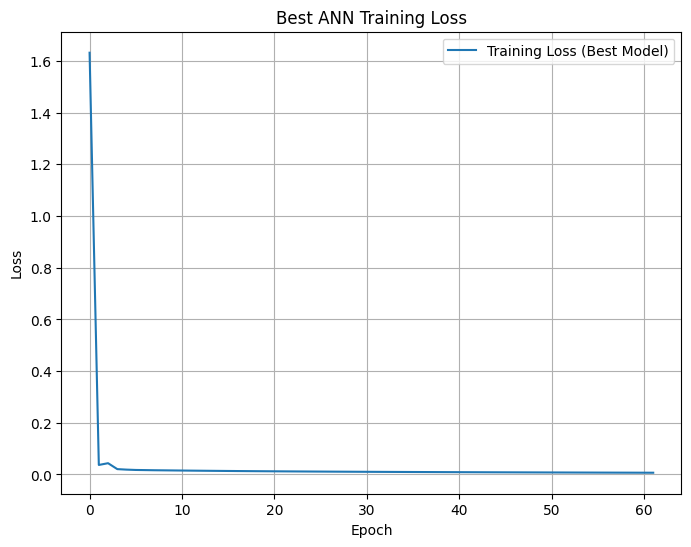

In [67]:
# Hyperparameter optimization for ANN

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42),
                          param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(T_train_scaled, ST_train)

# Best model
best_model = grid_search.best_estimator_
ST_pred_best = best_model.predict(T_test_scaled)
best_mse = mean_squared_error(ST_test, ST_pred_best)
best_r2 = r2_score(ST_test, ST_pred_best)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best model Test MSE: {best_mse:.6f}")
print(f"Best model Test R2: {best_r2:.6f}")

# Plot training loss for best model
plt.figure(figsize=(8, 6))
plt.plot(best_model.loss_curve_, label='Training Loss (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Best ANN Training Loss')
plt.legend()
plt.grid(True)
plt.show()